In [12]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [24]:
#import shutil
#shutil.unpack_archive("/content/drive/MyDrive/idd-lite.tar.gz", "/content/drive/MyDrive/")

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [20]:
gtfine_dir_train = "/content/drive/MyDrive/idd20k_lite/gtFine/train"

In [59]:
# List numeric folders
folders = sorted(os.listdir(gtfine_dir))
print("Number of folders:", len(folders))
print("Example folder names:", folders[:5])

Number of folders: 309
Example folder names: ['0', '1', '10', '100', '101']


In [44]:
leftimg_dir_train = "/content/drive/MyDrive/idd20k_lite/leftImg8bit/train"

In [45]:
# List numeric folders
folders = sorted(os.listdir(leftimg_dir_train))
print("Number of folders:", len(folders))
print("Example folder names:", folders[:5])

Number of folders: 309
Example folder names: ['0', '1', '10', '100', '101']


In [60]:
# Pick the first numeric folder
sample_folder = folders[0]
sample_folder_path = os.path.join(gtfine_dir_train, sample_folder)
print("\nLooking inside:", sample_folder_path)
print(os.listdir(sample_folder_path))


Looking inside: /content/drive/MyDrive/idd20k_lite/gtFine/train/0
['024703_label.png', '024703_inst_label.png', '024541_label.png', '024541_inst_label.png']


In [61]:
all_files = sorted(os.listdir(sample_folder_path))
print(all_files)

['024541_inst_label.png', '024541_label.png', '024703_inst_label.png', '024703_label.png']


In [62]:
# Find label PNG files (sorted)
label_files = sorted(
    [f for f in all_files if 'label' in f and f.endswith('.png')]
)
if not label_files:
    label_files = sorted(
        [f for f in all_files if f.endswith('.png')]
    )

print("\nFound label files (sorted):", label_files)


Found label files (sorted): ['024541_inst_label.png', '024541_label.png', '024703_inst_label.png', '024703_label.png']


In [64]:
# Separate semantic & instance label files
sem_label_files = [f for f in label_files if '_label.png' in f and '_inst_label.png' not in f]
inst_label_files = [f for f in label_files if '_inst_label.png' in f]

# Pick first pair
sample_sem_label_path = os.path.join(sample_folder_path, sem_label_files[0])
sample_inst_label_path = os.path.join(sample_folder_path, inst_label_files[0])

# Load as arrays
sem_mask = np.array(Image.open(sample_sem_label_path))
inst_mask = np.array(Image.open(sample_inst_label_path))

# Print stats
print("Semantic mask:")
print("  Shape:", sem_mask.shape)
print("  Dtype:", sem_mask.dtype)
print("  Unique values:", np.unique(sem_mask))

print("\nInstance mask:")
print("  Shape:", inst_mask.shape)
print("  Dtype:", inst_mask.dtype)
print("  Unique values:", np.unique(inst_mask))



Semantic mask:
  Shape: (227, 320)
  Dtype: uint8
  Unique values: [  0   2   3   4   5   6 255]

Instance mask:
  Shape: (227, 320)
  Dtype: uint8
  Unique values: [  0   2   3   4   5   6 255]


The printed unique values will tell you exactly which classes/instances are present in that image

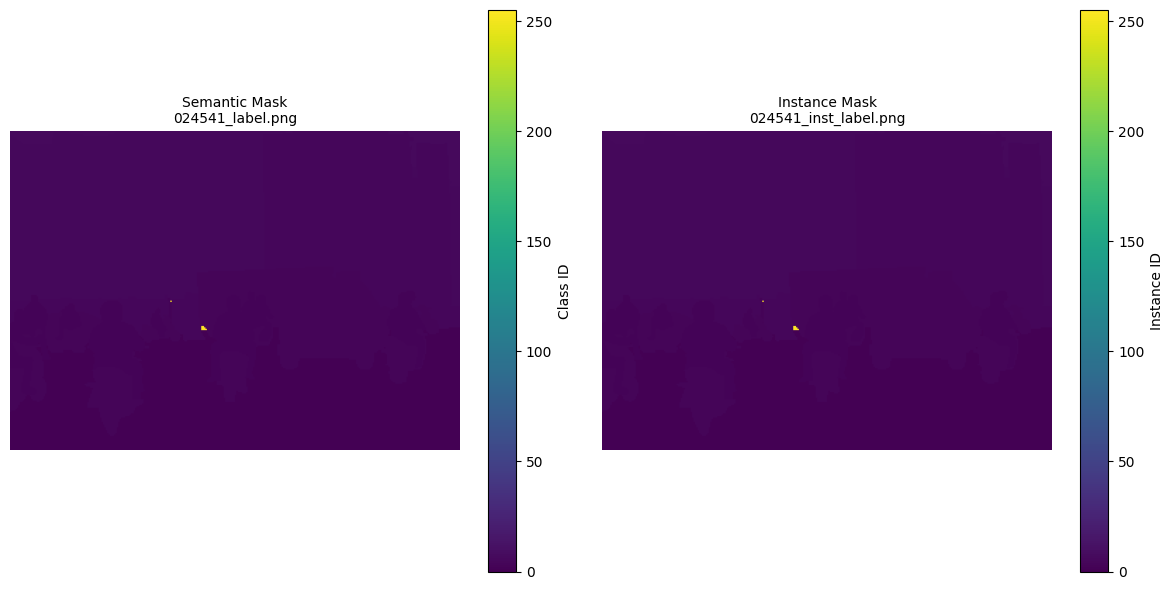

In [65]:
# Plot both
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(sem_mask)
plt.colorbar(label="Class ID")
plt.title(f"Semantic Mask\n{os.path.basename(sample_sem_label_path)}", fontsize=10)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(inst_mask)
plt.colorbar(label="Instance ID")
plt.title(f"Instance Mask\n{os.path.basename(sample_inst_label_path)}", fontsize=10)
plt.axis('off')

plt.tight_layout()
plt.show()




1. Level 1: broad category (vehicle, human, nature…)
2. Level 2: sub-category (motor vehicle, pedestrian, tree…)
3. Level 3: finer sub-category (car, truck, cyclist…)
4. Level 4: instance (specific object in the image)



*   Level 1-2 are encoded in the semantic mask (by ID number).
*   Level 3-4 are encoded in the instance mask.





In [51]:
# Show raw pixel values for first 10x10
print("\n10x10 region pixel values:")
print(mask[:10, :10])


10x10 region pixel values:
[[6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6]
 [5 6 6 6 6 6 6 6 6 6]
 [5 5 6 6 6 6 6 6 6 6]
 [5 5 5 5 6 6 6 6 6 6]
 [5 5 5 5 5 6 6 6 6 6]
 [5 5 5 5 5 5 6 6 6 6]
 [5 5 5 5 5 5 5 5 6 6]
 [5 5 5 5 5 5 5 5 5 6]]


In [52]:
#Try to load corresponding RGB image
# Often dataset has leftImg8bit folder parallel to gtFine
leftimg_dir = "/content/drive/MyDrive/idd20k_lite/leftImg8bit/train"
folders = sorted(os.listdir(leftimg_dir))
sample_folder = folders[0]
sample_folder_path = os.path.join(leftimg_dir, sample_folder)
print("\nLooking inside:", sample_folder_path)
print(os.listdir(sample_folder_path))



Looking inside: /content/drive/MyDrive/idd20k_lite/leftImg8bit/train/0
['024541_image.jpg', '024703_image.jpg']


In [56]:
sample_image_path = os.path.join(sample_folder_path, os.listdir(sample_folder_path)[0])
print("\nImage path:", sample_image_path)

if os.path.exists(sample_image_path):
    rgb_image = np.array(Image.open(sample_image_path))
else:
    rgb_image = None
    print("Could not find RGB image — check naming structure.")


Image path: /content/drive/MyDrive/idd20k_lite/leftImg8bit/train/0/024541_image.jpg


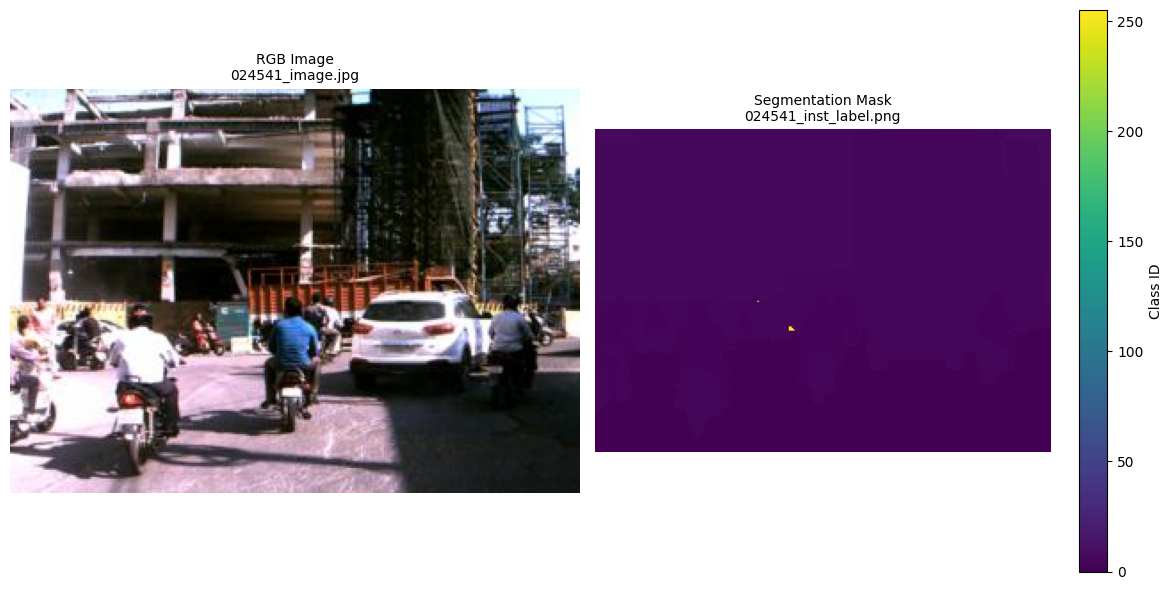

In [55]:
# Visualize both with filenames in titles
plt.figure(figsize=(12, 6))

if rgb_image is not None:
    plt.subplot(1, 2, 1)
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.title(f"RGB Image\n{os.path.basename(sample_image_path)}", fontsize=10)

plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.colorbar(label="Class ID")
plt.axis('off')
plt.title(f"Segmentation Mask\n{os.path.basename(sample_label_path)}", fontsize=10)

plt.tight_layout()
plt.show()


Are the semantic Ids and instance IDs same or different?


In [19]:
import os
import numpy as np
from PIL import Image

gtfine_dir = "/content/drive/MyDrive/idd20k_lite/gtFine/train"



In [26]:
# Gather subfolders
subfolders = sorted(os.listdir(gtfine_dir))

print(subfolders)

['0', '1', '10', '100', '101', '102', '104', '106', '108', '11', '110', '115', '116', '117', '118', '121', '122', '124', '125', '126', '127', '128', '130', '131', '133', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '151', '152', '154', '155', '156', '157', '158', '16', '160', '162', '163', '164', '166', '168', '170', '171', '173', '174', '175', '176', '177', '178', '2', '20', '201', '203', '204', '206', '207', '209', '211', '213', '216', '218', '220', '223', '224', '225', '23', '230', '231', '235', '236', '237', '238', '243', '245', '247', '248', '25', '250', '252', '257', '258', '26', '260', '261', '262', '263', '265', '266', '267', '268', '269', '273', '275', '277', '28', '280', '282', '283', '285', '288', '29', '293', '295', '298', '299', '30', '301', '302', '303', '306', '308', '31', '310', '311', '312', '314', '315', '316', '317', '32', '320', '321', '322', '325', '327', '329', '331', '333', '334', '336', '338', '339', '34', '340', '347', '35

In [27]:
print(len(subfolders))

309


In [43]:
import os
import numpy as np
from PIL import Image

gtfine_dir = "/content/drive/MyDrive/idd20k_lite/gtFine/train"
subfolders = sorted(os.listdir(gtfine_dir))

diff_count = 0
file_number = 0

for sub in subfolders:
    subdir = os.path.join(gtfine_dir, sub)
    #print(subdir)

    # Find semantic (_label) and instance (_inst_label) files
    instance_files = [f for f in os.listdir(subdir) if f.endswith("_label.png") and not f.endswith("_inst_label.png")]
    label_files = [f for f in os.listdir(subdir) if f.endswith("_inst_label.png")]

    # Compare each semantic file to its matching instance file
    for inst_file in instance_files:
        base_name = inst_file.replace("_label.png", "")
        match_file = f"{base_name}_inst_label.png"

        if match_file in label_files:
            file_number += 1

            # Load images
            inst_img = np.array(Image.open(os.path.join(subdir, inst_file)))
            lbl_img = np.array(Image.open(os.path.join(subdir, match_file)))

            # Get unique IDs
            unique_inst = np.unique(inst_img)
            unique_lbl = np.unique(lbl_img)

            if not np.array_equal(unique_inst, unique_lbl):
                diff_count += 1
                # Uncomment if you want to see the details
                # print(f"File: {inst_file}")
                # print(f"  Instance IDs: {unique_inst}")
                # print(f"  Semantic IDs: {unique_lbl}")
                # print("-" * 50)

print(f"Files with different unique IDs: {diff_count}")
print(f"Number of Files Compared: {file_number}")


Files with different unique IDs: 0
Number of Files Compared: 1403


Let us now see what are the unique values in semantics data to learn how to map them for YOLO labels.

In [17]:
gtfine_dir = "/content/drive/MyDrive/idd20k_lite/gtFine/train"

unique_values = set()
count=0
# Walk through the subfolders
for root, _, files in os.walk(gtfine_dir):
    for f in files:
        if f.endswith("_label.png") and not f.endswith("_inst_label.png"):  # only semantic label images
            img_path = os.path.join(root, f)
            img = np.array(Image.open(img_path))
            unique_values.update(np.unique(img))
            count+=1;

# Print sorted unique values
print("Total files compared:", count)
print("Unique semantic label IDs found:")
print(sorted(unique_values))


Total files compared: 1403
Unique semantic label IDs found:
[np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(255)]


Let us see how it is for \val

In [4]:
import os
import numpy as np
from PIL import Image

gtfine_dir_val = "/content/drive/MyDrive/idd20k_lite/gtFine/val"



In [5]:
# Gather subfolders
subfolders = sorted(os.listdir(gtfine_dir_val))

print(subfolders)

['119', '132', '147', '148', '149', '150', '153', '167', '17', '172', '18', '181', '205', '21', '212', '215', '222', '227', '234', '24', '240', '272', '276', '279', '286', '289', '291', '292', '3', '319', '328', '330', '341', '342', '346', '349', '378', '379', '385', '388', '412', '415', '418', '420', '461', '47', '486', '497', '51', '511', '516', '518', '533', '555', '567', '580', '62', '66', '67', '88', '89']


Checking if the semantic and instance masks have same info or different

In [6]:
diff_count = 0
file_number = 0

for sub in subfolders:
    subdir = os.path.join(gtfine_dir, sub)
    #print(subdir)

    # Find semantic (_label) and instance (_inst_label) files
    instance_files = [f for f in os.listdir(subdir) if f.endswith("_label.png") and not f.endswith("_inst_label.png")]
    label_files = [f for f in os.listdir(subdir) if f.endswith("_inst_label.png")]

    # Compare each semantic file to its matching instance file
    for inst_file in instance_files:
        base_name = inst_file.replace("_label.png", "")
        match_file = f"{base_name}_inst_label.png"

        if match_file in label_files:
            file_number += 1

            # Load images
            inst_img = np.array(Image.open(os.path.join(subdir, inst_file)))
            lbl_img = np.array(Image.open(os.path.join(subdir, match_file)))

            # Get unique IDs
            unique_inst = np.unique(inst_img)
            unique_lbl = np.unique(lbl_img)

            if not np.array_equal(unique_inst, unique_lbl):
                diff_count += 1
                # Uncomment if you want to see the details
                # print(f"File: {inst_file}")
                # print(f"  Instance IDs: {unique_inst}")
                # print(f"  Semantic IDs: {unique_lbl}")
                # print("-" * 50)

print(f"Files with different unique IDs: {diff_count}")
print(f"Number of Files Compared: {file_number}")

Files with different unique IDs: 0
Number of Files Compared: 204


In [7]:
unique_values = set()
count=0
# Walk through the subfolders
for root, _, files in os.walk(gtfine_dir):
    for f in files:
        if f.endswith("_label.png") and not f.endswith("_inst_label.png"):  # only semantic label images
            img_path = os.path.join(root, f)
            img = np.array(Image.open(img_path))
            unique_values.update(np.unique(img))
            count+=1;

# Print sorted unique values
print("Total files compared:", count)
print("Unique semantic label IDs found:")
print(sorted(unique_values))

Total files compared: 204
Unique semantic label IDs found:
[np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(255)]


Data Pipeline
 to get YOLO Labels Input in format:
`<class_id> <x_center> <y_center> <width> <height>`


In [46]:
import os
import numpy as np
from PIL import Image
import cv2

# Semantic ID → merged class name mapping
id_mapping = {
    0: "road",
    1: "parking",  # merged drivable fallback
    2: "sidewalk",
    3: "non_drivable",
    4: "person/animal",  # merged person + animal
    5: "rider",
    6: "vehicles",
}

# Create YOLO class ID mapping
class_names = sorted(set(id_mapping.values()))
name_to_id = {name: idx for idx, name in enumerate(class_names)}
print("YOLO Class mapping:")
for name, idx in name_to_id.items():
    print(f"{idx}: {name}")

# Input/Output paths
gtfine_dir = "/content/drive/MyDrive/idd20k_lite/gtFine/train"
output_label_dir = "/content/drive/MyDrive/yolo_labels"
os.makedirs(output_label_dir, exist_ok=True)

# Traverse all semantic label files
for root, dirs, files in os.walk(gtfine_dir):
    sem_files = [f for f in files if f.endswith("_label.png") and "_inst_label" not in f]

    for sem_file in sem_files:
        sem_path = os.path.join(root, sem_file)
        sem_mask = np.array(Image.open(sem_path))

        h, w = sem_mask.shape
        label_lines = []

        # Loop through each semantic class in the mask
        for sem_class in np.unique(sem_mask):
            if sem_class == 255:  # ignore label
                continue
            if sem_class not in id_mapping:
                continue

            # Binary mask for this class
            mask = (sem_mask == sem_class).astype(np.uint8)

            # Find connected components (each = one object)
            num_labels, labels = cv2.connectedComponents(mask)
            for comp_id in range(0, num_labels):
                ys, xs = np.where(labels == comp_id)
                if ys.size == 0:
                    continue

                # Bounding box
                x_min, x_max = xs.min(), xs.max()
                y_min, y_max = ys.min(), ys.max()

                # Convert to YOLO format
                x_center = (x_min + x_max) / 2 / w
                y_center = (y_min + y_max) / 2 / h
                box_width = (x_max - x_min) / w
                box_height = (y_max - y_min) / h

                # YOLO class ID
                class_name = id_mapping[sem_class]
                yolo_class_id = name_to_id[class_name]

                label_lines.append(
                    f"{yolo_class_id} {x_center:.6f} {y_center:.6f} {box_width:.6f} {box_height:.6f}"
                )

        # Save label file
        base_name = os.path.splitext(sem_file)[0].replace("_label", "")
        txt_path = os.path.join(output_label_dir, base_name + ".txt")
        with open(txt_path, "w") as f:
            f.write("\n".join(label_lines))

print("Conversion complete! YOLO label files saved to:", output_label_dir)


YOLO Class mapping:
0: non_drivable
1: parking
2: person/animal
3: rider
4: road
5: sidewalk
6: vehicles
Conversion complete! YOLO label files saved to: /content/drive/MyDrive/yolo_labels


In [8]:
import os
import numpy as np
from PIL import Image
import cv2

# Semantic ID → merged class name mapping
id_mapping = {
    0: "road",
    1: "parking",
    2: "sidewalk",
    3: "non_drivable",
    4: "person/animal",
    5: "rider",
    6: "vehicles",
}

# Create YOLO class ID mapping
class_names = sorted(set(id_mapping.values()))
name_to_id = {name: idx for idx, name in enumerate(class_names)}
print("YOLO Class mapping:")
for name, idx in name_to_id.items():
    print(f"{idx}: {name}")

# Input/Output paths
gtfine_dir = "/content/drive/MyDrive/idd20k_lite/gtFine"
output_label_dir = "/content/drive/MyDrive/yolo_labels"

# Process train and val sets
for split in ["train", "val"]:
    split_input_dir = os.path.join(gtfine_dir, split)
    split_output_dir = os.path.join(output_label_dir, split)

    for root, _, files in os.walk(split_input_dir):
        sem_files = [f for f in files if f.endswith("_label.png") and "_inst_label" not in f]

        for sem_file in sem_files:
            sem_path = os.path.join(root, sem_file)
            sem_mask = np.array(Image.open(sem_path))

            h, w = sem_mask.shape
            label_lines = []

            for sem_class in np.unique(sem_mask):
                if sem_class == 255 or sem_class not in id_mapping:
                    continue

                mask = (sem_mask == sem_class).astype(np.uint8)
                num_labels, labels = cv2.connectedComponents(mask)

                for comp_id in range(0, num_labels):
                    ys, xs = np.where(labels == comp_id)
                    if ys.size == 0:
                        continue

                    x_min, x_max = xs.min(), xs.max()
                    y_min, y_max = ys.min(), ys.max()

                    x_center = (x_min + x_max) / 2 / w
                    y_center = (y_min + y_max) / 2 / h
                    box_width = (x_max - x_min) / w
                    box_height = (y_max - y_min) / h

                    class_name = id_mapping[sem_class]
                    yolo_class_id = name_to_id[class_name]

                    label_lines.append(
                        f"{yolo_class_id} {x_center:.6f} {y_center:.6f} {box_width:.6f} {box_height:.6f}"
                    )

            # Keep subfolder structure
            rel_dir = os.path.relpath(root, split_input_dir)
            save_dir = os.path.join(split_output_dir, rel_dir)
            os.makedirs(save_dir, exist_ok=True)

            base_name = os.path.splitext(sem_file)[0].replace("_label", "")
            txt_path = os.path.join(save_dir, base_name + ".txt")
            with open(txt_path, "w") as f:
                f.write("\n".join(label_lines))

print("Conversion complete! YOLO label files saved to:", output_label_dir)


YOLO Class mapping:
0: non_drivable
1: parking
2: person/animal
3: rider
4: road
5: sidewalk
6: vehicles
Conversion complete! YOLO label files saved to: /content/drive/MyDrive/yolo_labels


# Training YOLOv5 Model for Object Detection

In [11]:
import os

# List what's inside leftImg8bit
print("Contents of leftImg8bit:")
print(os.listdir("/content/drive/MyDrive/idd20k_lite/leftImg8bit/"))


Contents of leftImg8bit:
['test', 'val', 'train']


In [13]:
import os

print("IMAGES_ROOT:", IMAGES_ROOT)
print("LABELS_ROOT:", LABELS_ROOT)

for split in ["train", "val"]:
    img_split_root = os.path.join(IMAGES_ROOT, split)
    print("\nChecking", img_split_root)
    if not os.path.exists(img_split_root):
        print("❌ Split folder not found")
        continue

    found = []
    for root, _, files in os.walk(img_split_root):
        for f in files:
            if f.lower().endswith((".jpg",".jpeg",".png")):
                found.append(os.path.join(root, f))
    print(f"Found {len(found)} images in {split}")


IMAGES_ROOT: /content/drive/MyDrive/idd20k_lite/leftImg8bit
LABELS_ROOT: /content/drive/MyDrive/yolo_labels

Checking /content/drive/MyDrive/idd20k_lite/leftImg8bit/train
Found 1403 images in train

Checking /content/drive/MyDrive/idd20k_lite/leftImg8bit/val
Found 204 images in val


In [3]:
# =========================
# 0) Paths & class names
# =========================
import os, shutil, glob

# CHANGE THESE if your paths differ
IMAGES_ROOT = "/content/drive/MyDrive/idd20k_lite/leftImg8bit"  # has train/, val/ with numeric subfolders
LABELS_ROOT = "/content/drive/MyDrive/yolo_labels"              # has train/, val/ with matching structure

# Where we'll build a YOLO-friendly dataset (images/ + labels/ sibling dirs)
DATASET_ROOT = "/content/drive/MyDrive/idd_yolo"  # local (fast) workspace

CLASSES = ["road","parking","sidewalk","non_drivable","person/animal","rider","vehicles"]  # 7 classes




In [ ]:
# Fresh workspace
if os.path.exists(DATASET_ROOT):
    shutil.rmtree(DATASET_ROOT)
for split in ["train","val"]:
    os.makedirs(os.path.join(DATASET_ROOT, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(DATASET_ROOT, split, "labels"), exist_ok=True)

print("Dataset workspace:", DATASET_ROOT)

In [18]:
# ===========================================
# 1) Mirror images + labels with symlinks
#    (keeps nested numeric subfolders)
#    If a label is missing, create an empty .txt
# ===========================================
import os

def ensure_dir(p):
    os.makedirs(p, exist_ok=True)

def mirror_split(split):
    img_split_root = os.path.join(IMAGES_ROOT, split)
    lbl_split_root = os.path.join(LABELS_ROOT, split)
    out_img_root = os.path.join(DATASET_ROOT, split, "images")
    out_lbl_root = os.path.join(DATASET_ROOT, split, "labels")

    for root, _, files in os.walk(img_split_root):
        # keep only images
        img_files = [f for f in files if f.lower().endswith((".jpg",".jpeg",".png"))]
        if not img_files:
            continue

        # relative path from split root, e.g. "482"
        rel = os.path.relpath(root, img_split_root)

        # make parallel dirs
        out_img_dir = os.path.join(out_img_root, rel)
        out_lbl_dir = os.path.join(out_lbl_root, rel)
        ensure_dir(out_img_dir)
        ensure_dir(out_lbl_dir)

        for f in img_files:
            img_src = os.path.join(root, f)
            img_dst = os.path.join(out_img_dir, f)

            # symlink or copy (symlink is faster and saves space)
            if not os.path.exists(img_dst):
                try:
                    os.symlink(img_src, img_dst)
                except Exception:
                    shutil.copy2(img_src, img_dst)



            # expected label (same basename, .txt) in LABELS_ROOT
            base = os.path.splitext(f)[0]
            # If filename ends with "_image", strip it for label matching
            if base.endswith("_image"):
                base = base[:-6]  # removes the last 6 characters
            lbl_src = os.path.join(lbl_split_root, rel, base + ".txt")
            lbl_dst = os.path.join(out_lbl_dir, base + "_image.txt") #To keep it in sync with image names

            if os.path.exists(lbl_src):
                if not os.path.exists(lbl_dst):
                    try:
                        os.symlink(lbl_src, lbl_dst)
                    except Exception:
                        shutil.copy2(lbl_src, lbl_dst)
            else:
                # create an empty txt if no objects (YOLO expects a file)
                if not os.path.exists(lbl_dst):
                    with open(lbl_dst, "w") as _:
                        pass

for split in ["train","val"]:
    mirror_split(split)

print("Mirroring complete.")


Mirroring complete.


In [5]:
# =========================
# 2) Install YOLOv5
# =========================
%cd /content
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17521, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 17521 (delta 9), reused 0 (delta 0), pack-reused 17497 (from 4)
Receiving objects: 100% (17521/17521), 16.61 MiB | 16.45 MiB/s, done.
Resolving deltas: 100% (11998/11998), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4

In [8]:
# ==================================
# 3) Create dataset YAML for YOLOv5
# ==================================
yaml_text = f"""# IDD YOLO dataset
path: {DATASET_ROOT}
train: train/images
val: val/images

nc: {len(CLASSES)}
names: {CLASSES}
"""

with open("data/idd.yaml","w") as f:
    f.write(yaml_text)

print(open("data/idd.yaml").read())


# IDD YOLO dataset
path: /content/drive/MyDrive/idd_yolo
train: train/images
val: val/images

nc: 7
names: ['road', 'parking', 'sidewalk', 'non_drivable', 'person/animal', 'rider', 'vehicles']



In [14]:
pip install -U albumentations==1.0.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 2.0.8
    Uninstalling albumentations-2.0.8:
      Successfully uninstalled albumentations-2.0.8


In [15]:
# =========================
# 4) Train YOLOv5 (s/m/l)
# =========================
!python train.py  --img 320  --batch 16   --epochs 1  --data data/idd.yaml   --weights yolov5s.pt   --name idd_yolo_s_quick   --cache


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-08-13 09:58:44.435242: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755079124.455964    3714 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755079124.462315    3714 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755079124.477820    3714 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755079124.477850    3714 computation_placer.cc:177] computation placer already registere

In [7]:
3# =========================
# 4) Train YOLOv5 (s/m/l)
# =========================
# Tip: adjust --batch to fit GPU memory; start with yolov5s.pt
#!python train.py --img 640 --batch 16 --epochs 50 --data data/idd.yaml --weights yolov5s.pt --name idd_yolo_s


Experiment dir: runs/train/idd_yolo_s_quick3


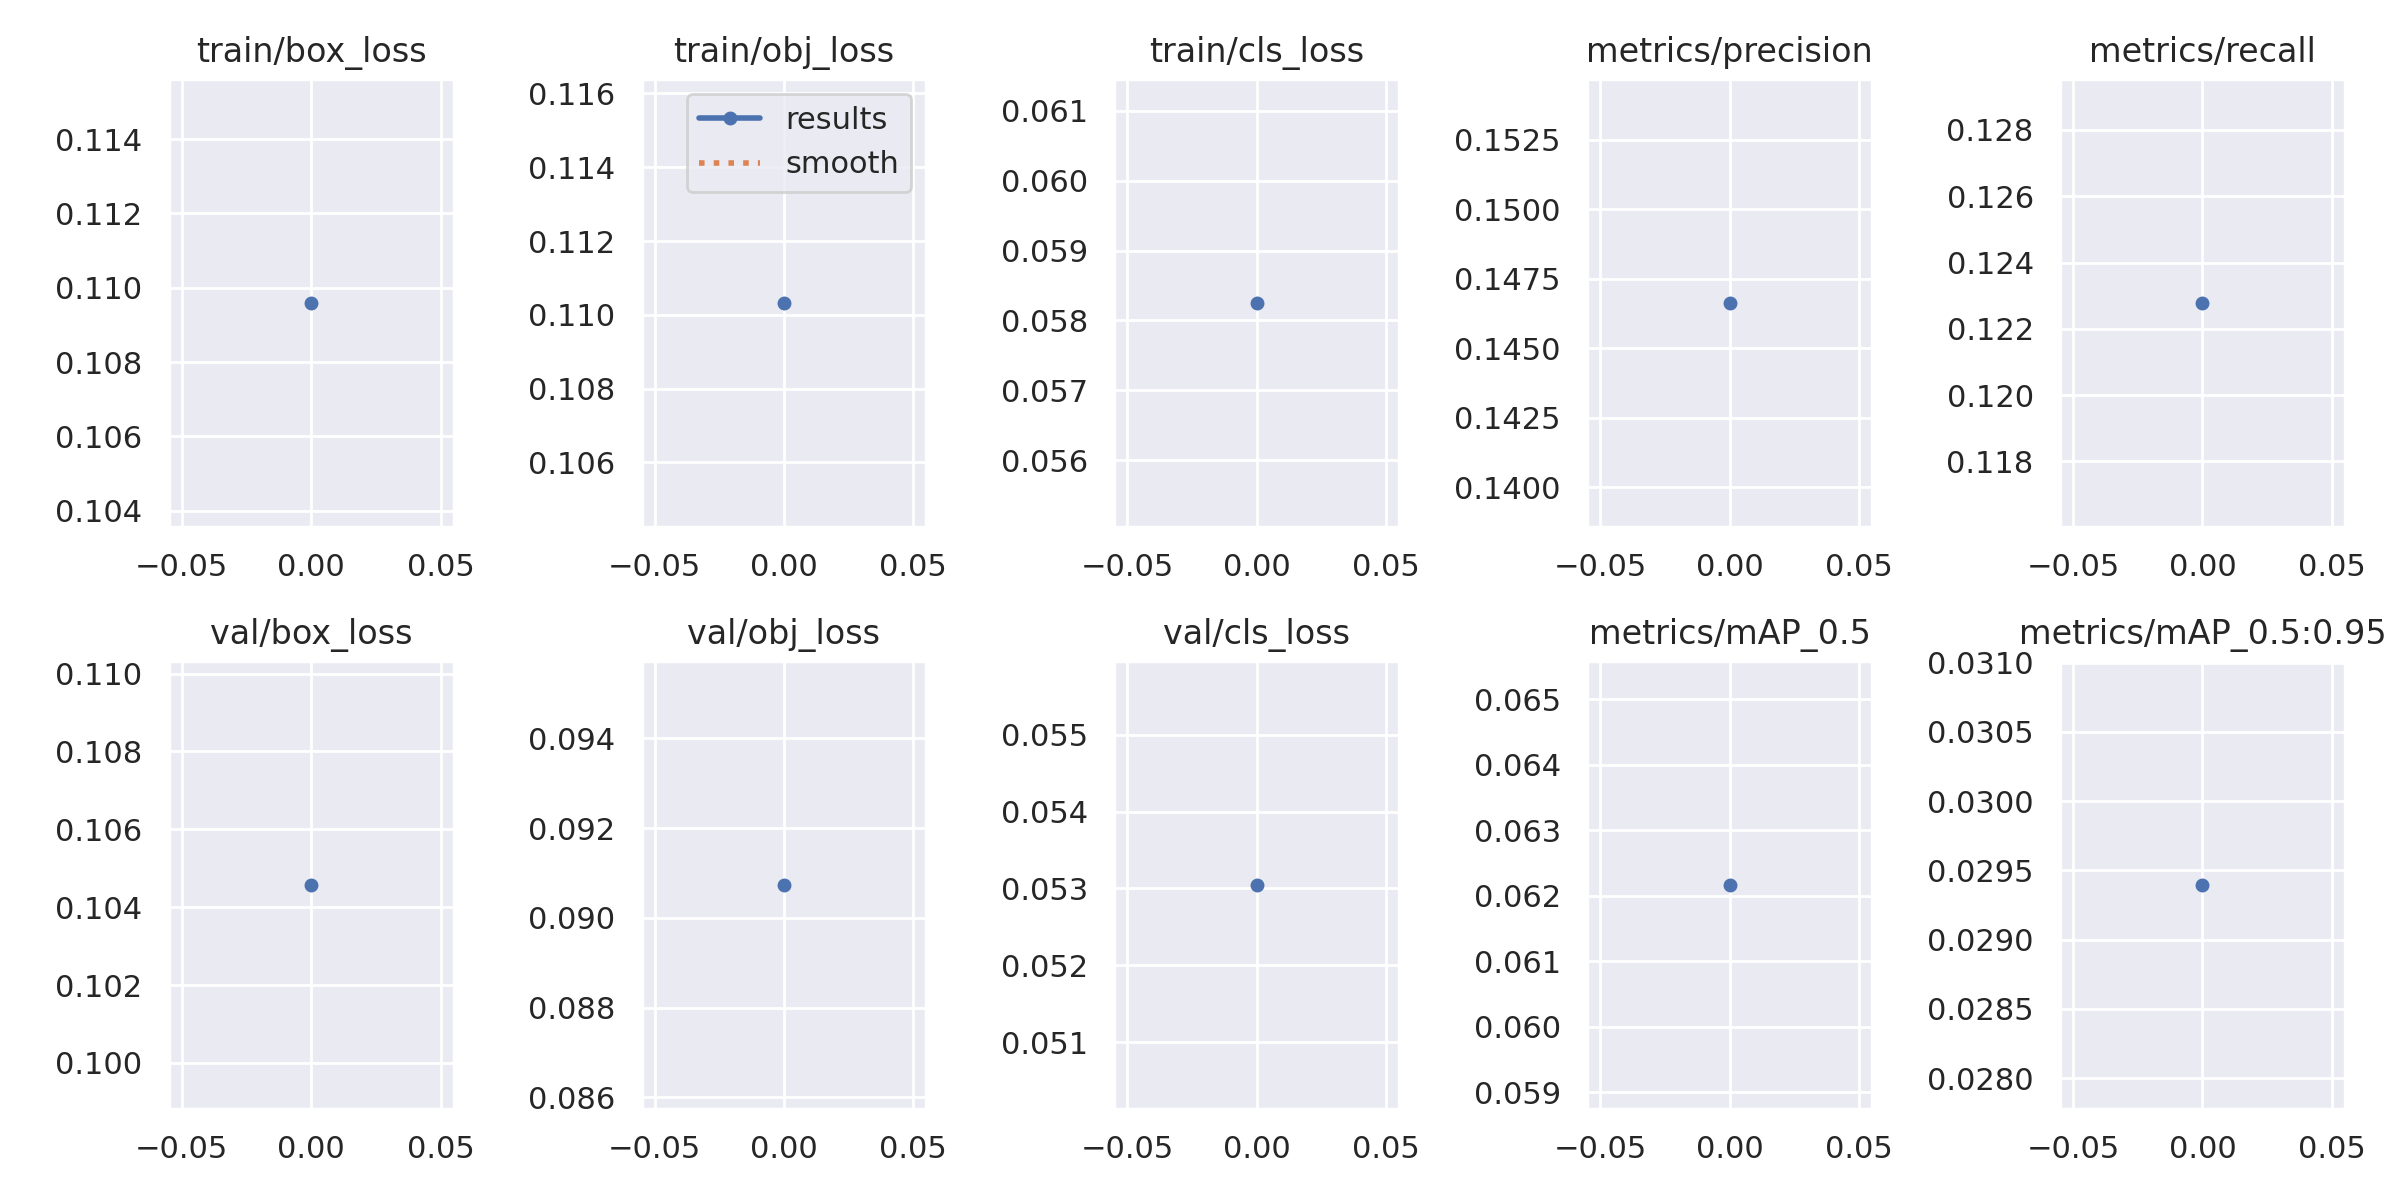

In [16]:
# =========================
# 5) Inspect training curves
# =========================
from IPython.display import Image, display
import os, glob

exp_dir = sorted(glob.glob("runs/train/idd_yolo_s*"))[-1]
print("Experiment dir:", exp_dir)
display(Image(filename=os.path.join(exp_dir, "results.png")))


In [23]:
# =========================================
# 6) Run inference on a test images
# =========================================
!python detect.py     --weights runs/train/idd_yolo_s_quick3/weights/best.pt     --source "/content/drive/MyDrive/idd20k_lite/leftImg8bit/test/**/*.jpg"     --img 640     --conf 0.25


detect: weights=['runs/train/idd_yolo_s_quick3/weights/best.pt'], source=/content/drive/MyDrive/idd20k_lite/leftImg8bit/test/**/*.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-423-g567c6646 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/404 /content/drive/MyDrive/idd20k_lite/leftImg8bit/test/103/206393_image.jpg: 480x640 1 sidewalk, 30.6ms
image 2/404 /content/drive/MyDrive/idd20k_lite/leftImg8bit/test/103/331011_image.jpg: 480x640 (no detections), 9.2ms
image 3/404 /content/drive/My

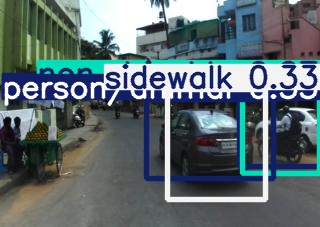

In [27]:
# =========================================
# 7) Preview some predictions inline
# =========================================

# Path to weights and test image
weights_path = "runs/train/idd_yolo_s_quick3/weights/best.pt"
test_image_path = "/content/drive/MyDrive/idd20k_lite/leftImg8bit/test/120/773243_image.jpg"

from IPython.display import Image, display
import glob

# Find latest detection output folder
exp_folder = sorted(glob.glob('runs/detect/exp*'), key=lambda x: int(x.split('exp')[-1] or 0))[-1]

# Display the annotated version of that specific file
result_image_path = f"{exp_folder}/773243_image.jpg"
display(Image(filename=result_image_path))
